 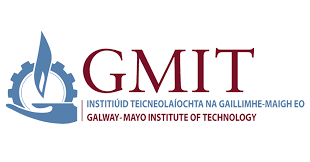

**Fundamentals for Data Analysis Project 2020**


**Author:**  Richard Deegan 
 
 
 **Lecturer:** Ian McLoughlin
 
 **Student ID:** G00387896@gmit.ie

# Problem Statement

In this project you must perform and explain simple linear regression using Python on the powerproduction dataset available on [Moodle](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv). The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis. Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.


2. In that notebook, an explanation of your regression and an analysis of its accuracy.


3. Standard items in a git repository such as a README.

A full set of instructions can be found [here](https://github.com/Deego88/FoDA_Project_2020/blob/master/Images_FoDA_Project_2020/FoDA_Project_2020.pdf)

# Preliminaries

In order to effectively answer the Problem Statement various relevant libraries must be imported. For this we will import Numpy as it contains essential libraries. Pandas to assist with data analysis and manipulation. Matplotlib.plyplot and Seaborn libraries will be utilised to assist in the visualisation of numbers to user friendly graphs.



In [98]:
# Import the necessary libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The magic inline command will be utilised in order to ensure the correct display of the plots within the Jupyter Notebook. This will allow the plots to be rendered inline within the Notebook [1].

In [99]:
# Magic command used to visualise plots in Jupyter.
%matplotlib inline

Drawing attractive figures is important. When making figures for yourself, as you explore a dataset, it’s nice to have plots that are pleasant to look at. Visualizations are also central to communicating quantitative insights to an audience, and in that setting it’s even more necessary to have figures that catch the attention and draw a viewer in. The plot aesthetics will be set from the outset in order to standardise the format [2].

In [100]:
# Setting the style of the graphs to be displayed (colour and size).
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Introduction

Regression analysis is a conceptually simple method for investigating functional relationships amoung variables. For example a real estate appraiser may wish to conduct an analysis on the relationship between the sale price of a house and from selected physical characteristics of the house. The relationships are expressed in the form of an equation which connects  the response or dependent variable and one or more explanatory or predictor variables. In this instance the dependent variable would be sale price of them home, as this is dependent on the other variables, this might be the square foot size for example [3].

It will also give you other statistics (including a p-value and a correlation coefficient) to tell you how accurate your model is. A p value is used in hypothesis testing to help you support or reject the null hypothesis. The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis. Also, the Correlation coefficients are used to measure how strong a relationship is between two variables [4].

**Choosing a Linear Regression Analysis**

In most statistical packages, a curve estimation procedure produces curve estimation regression statistics and related plots for many different models (linear, logarithmic, inverse, quadratic, cubic, power, S-curve, logistic, exponential etc.). It is essential to plot the data in order to determine which model to use for each depedent variable. If the variables appear to be related linearly, a simple linear regression model can be used but in the case that the variables are not linearly related, data transformation might help. If the transformation does not help then a more complicated model may be needed. It is strongly advised to view early a scatterplot of your data; if the plot resembles a mathematical function you recognize, fit the data to that type of model. For example, if the data resemble an exponential function, an exponential model is to be used. Alternatively, if it is not obvious which model best fits the data, an option is to try several models and select among them. It is strongly recommended to screen the data graphically (e.g. by a scatterplot) in order to determine how the independent and dependent variables are related (linearly, exponentially etc.) [5, 6]

# First Look at the data

In [101]:
# Import CSV data set from moodle link.
wind_turbine_dataset = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
wind_turbine_dataset

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [102]:
# Conduct a visual inspection of full data set.
pd.set_option('display.max_rows', None)
wind_turbine_dataset

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [103]:
# Check if there are any null values in the data set.
wind_turbine_dataset.isnull().sum()

speed    0
power    0
dtype: int64

In [104]:
# Provide a brief describtion of data set.
wind_turbine_dataset.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


**Comments on the description**


From the initial observations of the data set we can see that we have 500 data points for both speed and power. The mean of the power is circa 4 x that of speed. The standard deviation for power is 41.61 this indicates that there is a large spread in the power data, while the speed has a standard deviation of 7.22. The data set contains no negative values as the min value is 0 for both speed and power. 

#  Visualise the Wind Turbine Dataset

Text(0.5, 0.98, 'Wind Turbine Dataset')

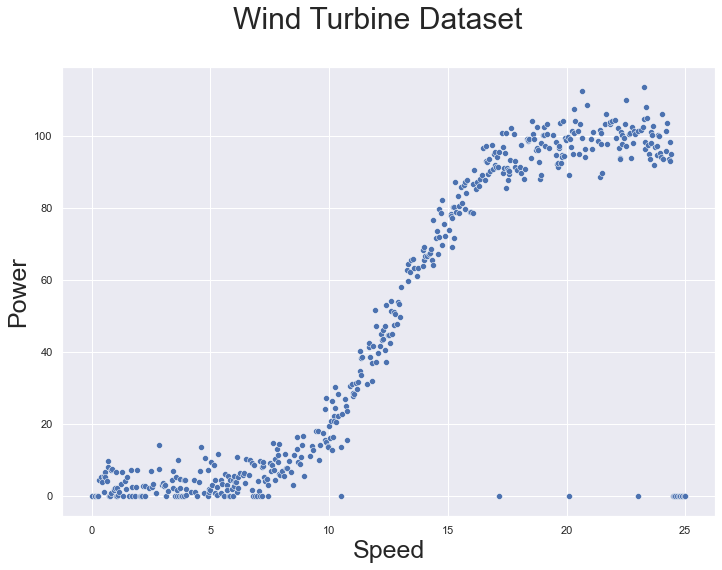

In [105]:
# Plot the Data Set on a Scatter Plot.
sns.scatterplot(data=wind_turbine_dataset, x="speed", y="power",
    sizes=(250, 250), legend="full")

# Add axis labels & title.
plt. xlabel("Speed", fontsize=25)
plt. ylabel("Power", fontsize=25)
plt. suptitle("Wind Turbine Dataset", fontsize=30)

# Wind Turbine Dataset With 3 Possible Lines of Best Fit

**Straight Lines, Linear Regression**

All straight lines can be expressed in the form $y = mx + c$. The number $m$ is the slope of the line. The slope is how much $y$ increases by when $x$ is increased by 1.0. The number $c$ is the y-intercept of the line. It's the value of $y$ when $x$ is 0.

To fit a straight line to the data, we just must pick values for $m$ and $c$. These are called the parameters of the model, and we want to pick the best values possible for the parameters. That is, the best parameter values given the data observed. Below we show various lines plotted over the data, with different values for $m$ and $c$ [7].

Three possible lines of best fit will now be applied to the model through "guesstimation". 


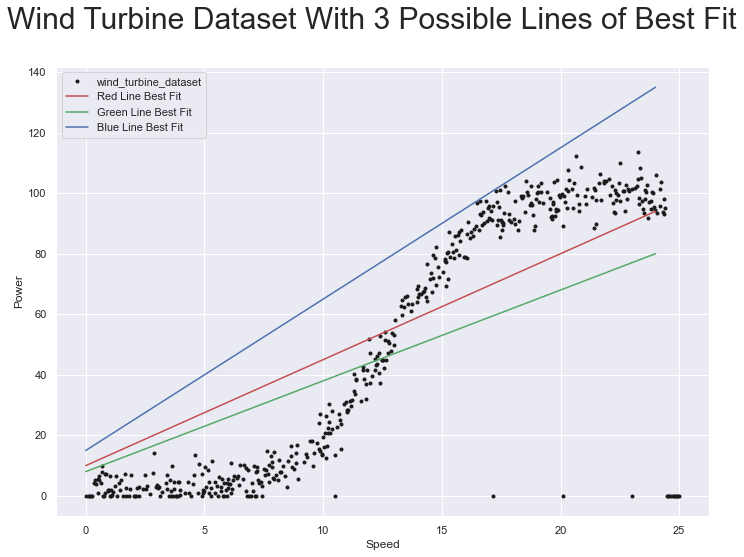

In [106]:
# Plot power versus speed.
plt.plot(wind_turbine_dataset.speed, wind_turbine_dataset.power, 'c.', label="wind_turbine_dataset")

# Overlay 3 possible lines of best fit on the plot.
x = np.arange(0.0, 25.0, 1.0)
plt.plot(x, 3.5 * x + 10.0, 'r-', label=r"Red Line Best Fit")
plt.plot(x, 3.0 * x +  8.0, 'g-', label=r"Green Line Best Fit")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"Blue Line Best Fit")

# Add a legend.
plt.legend()

# Add axis labels & title.
plt.xlabel("Speed")
plt.ylabel("Power")
plt. suptitle("Wind Turbine Dataset With 3 Possible Lines of Best Fit", fontsize=30)

# Show the plot.
plt.show()

# Calculating the Cost of the Line

In order to find the best fit line of the three we can calculate the cost of each of the lines. A cost function maps event or values of one or more variables onto a real number. In this case, the event we are finding the cost of is the difference between estimated values, or the difference between the hypothesis and the real values — the actual data we are trying to fit a line to [8].



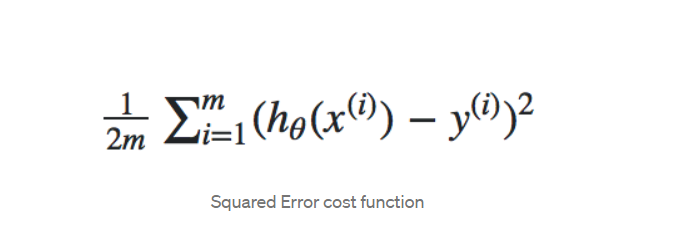

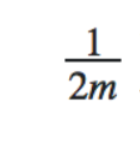

On the far left, we have 1/2*m. m is the number of samples.


Next we have a sigma:

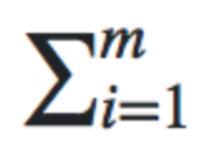

This means the sum. In this case, the sum from i to m, We repeat the calculation to the right of the sigma, that is:

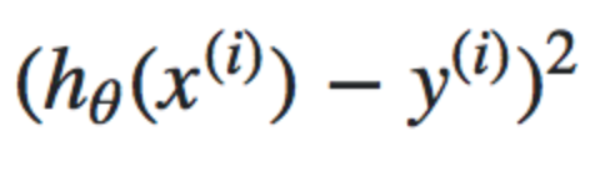

The actual calculation is just the hypothesis value for h(x), minus the actual value of y. Then you square whatever you get.
The final result will be a single number. We repeat this process for all the hypothesis, in this case Red Line Best Fit , Green Line Best Fit and Blue Line Best Fit. Whichever has the lowest result, or the lowest “cost” is the best fit of the three hypothesis [8].

In [107]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([(wind_turbine_dataset.power[i] - m * wind_turbine_dataset.speed[i] - c)**2 for i in range(wind_turbine_dataset.speed.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (3.5, 10.0, cost(3.5, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (3.0,  8.0, cost(3.0,  8.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  3.50 and c = 10.00: 304898.93
Cost with m =  3.00 and c =  8.00: 332540.75
Cost with m =  5.00 and c = 15.00: 682542.18


From the above analysis we can see that in fact the red line is the line which has the lowest cost value and therefore it is the best fit (out of the Red, Green and Blue lines). However we want to find the actual best fit line based on the data. We want to find the best values for m and c in the equation y = mx + c.

<br>

# Calculation of the Best Fit Line

In [108]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of Speed and Power.
speed_avg = np.mean(wind_turbine_dataset.speed)
power_avg = np.mean(wind_turbine_dataset.power)

# Subtract means from Speed and Power.
speed_zero = wind_turbine_dataset.speed - speed_avg
power_zero = wind_turbine_dataset.power - power_avg

# The best m is found by the following calculation.
m = np.sum(speed_zero * power_zero) / np.sum(speed_zero * speed_zero)

# Use m from above to calculate the best c.
c = power_avg - m * speed_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.917596 and c is -13.899903.


We can also use the **np.polyfit** function to quickly generate the line of best fit [9].

In [109]:
# np.polyfit(speed, power, 1)
np.polyfit(wind_turbine_dataset.speed, wind_turbine_dataset.power, 1)

array([  4.91759567, -13.89990263])

<br>

**Plot Line of Best Fit**

We can now plot the line of best fit with our new data

m is 4.917596 and c is -13.899903.

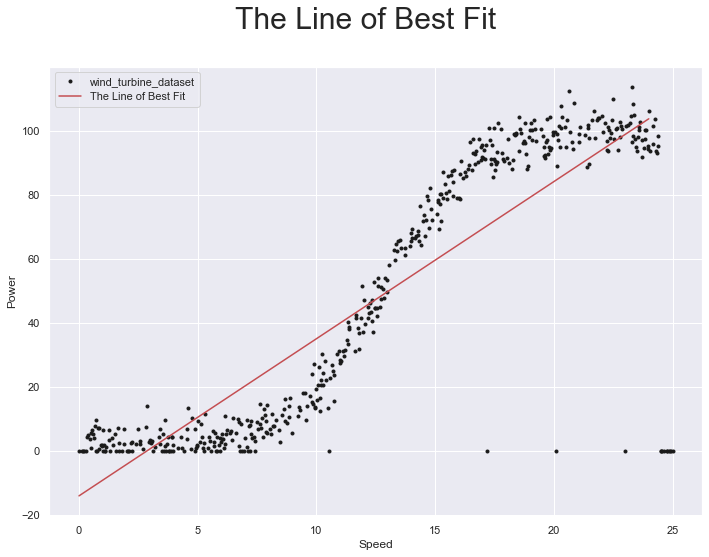

In [110]:
# Plot power versus speed.
plt.plot(wind_turbine_dataset.speed, wind_turbine_dataset.power, 'c.', label="wind_turbine_dataset")

# Overlay 3 possible lines of best fit on the plot.
x = np.arange(0.0, 25.0, 1.0)
plt.plot(x, 4.9 * x + -13.899903, 'r-', label=r"The Line of Best Fit")

# Add a legend.
plt.legend()

# Add axis labels & title.
plt.xlabel("Speed")
plt.ylabel("Power")
plt.suptitle("The Line of Best Fit", fontsize=30)

# Show the plot.
plt.show()

In [111]:
# y = 4.92(x) + -13.90.
# x is the value of the independent speed variable. 
print("The Cost with m = %5.2f and c = %5.2f  is: %8.2f" % (m, c, cost(m, c)))

The Cost with m =  4.92 and c = -13.90  is: 234241.16


# Improving Accuracy with Polynomial Regression

The Red line was our best guess at fitting the data to a straight line with a cost of 304,898.93

The Line of best fit had a cost of 234,241.16

Therefore by utilisng the np.polyfit function we were able to reduce the cost by  304,898.93 - 234,241.16 = 70,657.77

However from observation of the data set it can be seen that it is still not linear in nature and we still fall short of producing an accurate line which fits the curve of the data. For instance, from approximately 0-10 on the X-axis (speed) the data set is more or less flat. Then from 10-20 on the x-axis the data set sharply increases. Finally the data set tapers of and remains horizontal from approximately 20-25 on the X-axis. 

In order to improve the accuracy of our line of best fit we can conduct a **Polynomial Regression**. The polynomial regression model, which is useful when there is reason to believe that relationship between two variables is curvilinear An example of such can be seen below on the Fitted Line Plot diagram [11].

Polynomial Regression is a form of regression analysis in which the relationship between the independent variables and dependent variables are modeled in the nth degree polynomial. Polynomial Regression models are usually fit with the method of least squares.The least square method minimizes the variance of the coefficients,under the Gauss Markov Theorem. Polynomial Regression is a special case of Linear Regression where we fit the polynomial equation on the data with a curvilinear relationship between the dependent and independent variables [13].

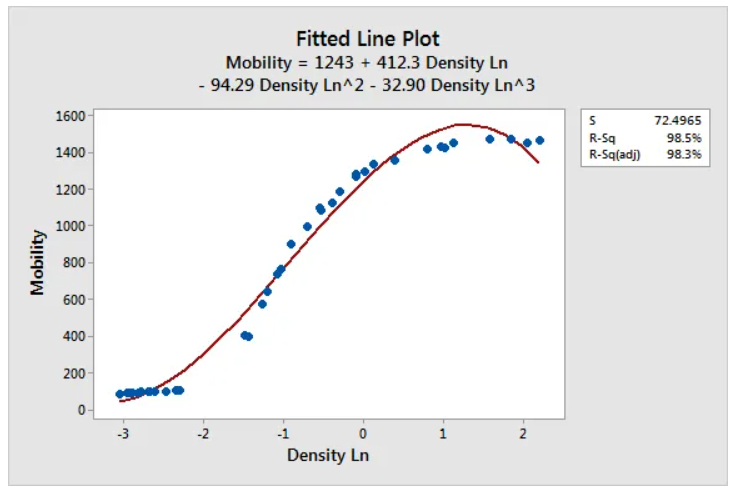

Polynomial Regression does not require the relationship between the independent and dependent variables to be linear in the data set,This is also one of the main difference between the Linear and Polynomial Regression. Polynomial Regression is generally used when the points in the data are not captured by the Linear Regression Model and the Linear Regression fails in describing the best result clearly [12, 13].


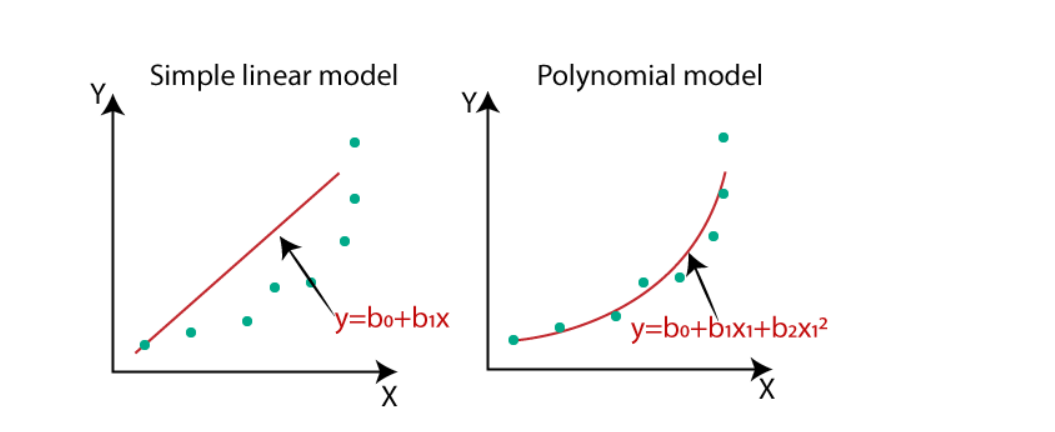

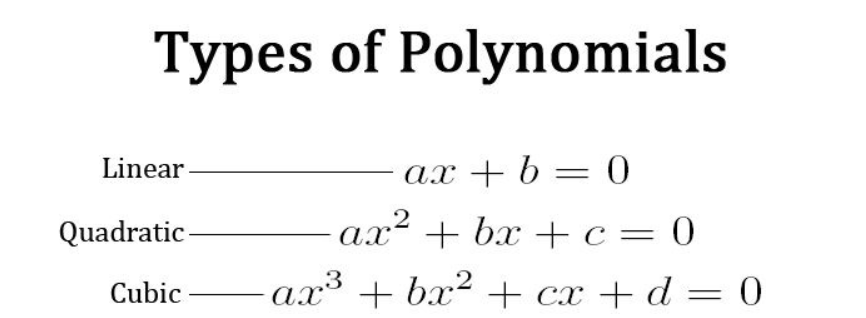

## Polynomial Regression (3 points)

In [112]:
# Create the best fit coefficients (3 points).

coeff3 = np.polyfit(wind_turbine_dataset["speed"], wind_turbine_dataset["power"], 2)
coeff3

array([ -0.07021949,   6.67418543, -21.22684391])

In [113]:
# Assign the data for x and y (y = ax**2 + bx + c).

x = wind_turbine_dataset["speed"]
y1 = coeff3[0] * x**2 + coeff3[1] * x + coeff3[2] 

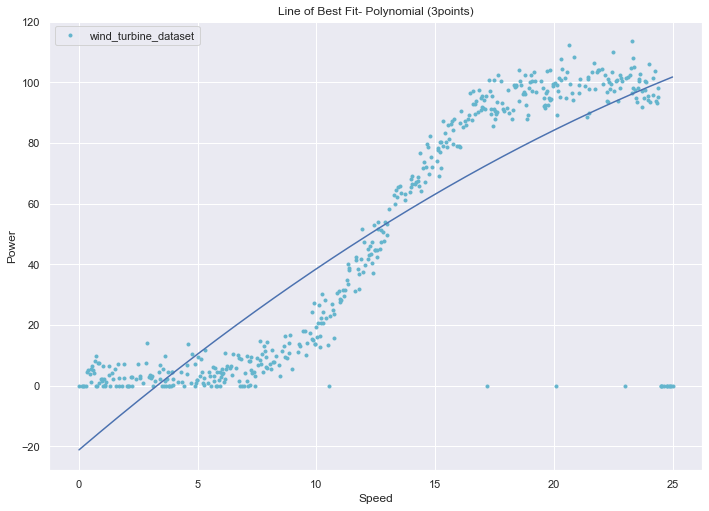

In [114]:
# Show the new line.

plt.plot(wind_turbine_dataset["speed"], wind_turbine_dataset["power"], "c.", label= "wind_turbine_dataset")

plt.plot(x, y1, "-")
plt.title("Line of Best Fit- Polynomial (3points)")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.show()

**Comment:** Here we can see that the line now contains a curve and it bends towards the flow of the wind turbine dataset. The curve however is not all that prominent and so we should add point to assist in the bending of the line. 

## Polynomial Regression (4 points)

In [115]:
# Create the best fit coefficients (4 points).

coeff4 = np.polyfit(wind_turbine_dataset["speed"], wind_turbine_dataset["power"], 3)
coeff4


array([ -0.05241927,   1.89485751, -12.94285866,  19.20130246])

In [116]:
# Assign the data for x and y (y = ax**3 + bx**2+ cx + d).

x = wind_turbine_dataset["speed"]
y2 = coeff4[0] * x**3 + coeff4[1] * x**2 + coeff4[2] * x + coeff4[3]

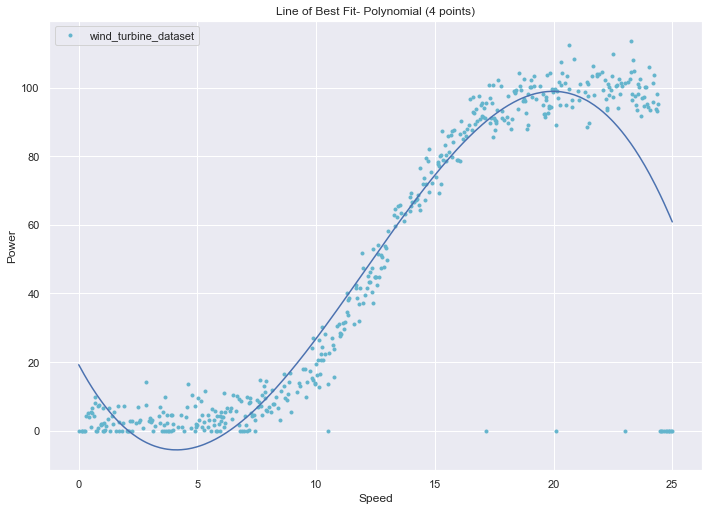

In [117]:
# Show the new line. 

plt.plot(wind_turbine_dataset["speed"], wind_turbine_dataset["power"], "c.", label= "wind_turbine_dataset")

plt.plot(x, y2, "-")
plt.title("Line of Best Fit- Polynomial (4 points)")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.show()

**Comment:** Here we can see straight away that by using the third degree polynomial equation we have fitted a line to our Wind Turbine Data set that follows the curve of the data more accurately. 


## Polynomial Regression (5 points)

In [118]:
# Create the best fit coefficients (5 points).

coeff5 = np.polyfit(wind_turbine_dataset["speed"], wind_turbine_dataset["power"], 4)
coeff5

array([-2.91850218e-03,  9.31965285e-02, -4.33771545e-01, -1.66731072e-01,
        3.89358544e+00])

In [119]:
# Assign the data for x and y (y = ax**4 + bx**3+ cx**2 + dx + e).

x = wind_turbine_dataset["speed"]
y3 = coeff5[0] * x**4 + coeff5[1] * x**3 + coeff5[2] * x**2 + coeff5[3] * x + coeff5[4]

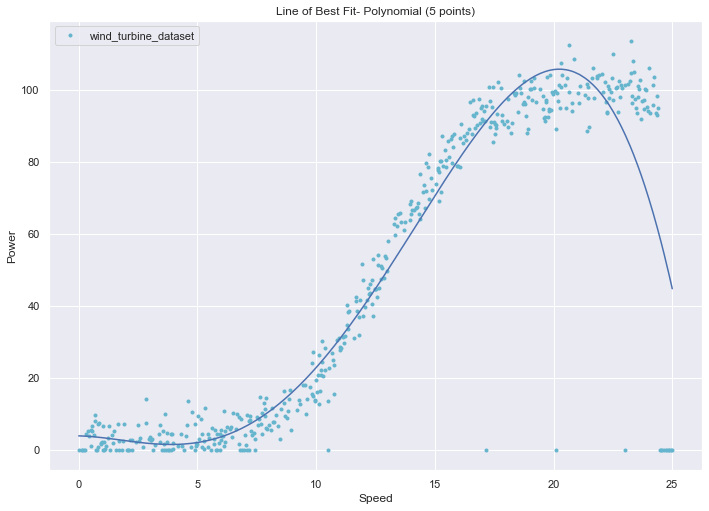

In [120]:
# Show the new line.

plt.plot(wind_turbine_dataset["speed"], wind_turbine_dataset["power"], "c.", label= "wind_turbine_dataset")

plt.plot(x, y3, "-")
plt.title("Line of Best Fit- Polynomial (5 points)")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.show()

**Comment:** Here we can see that the line now fits the data almost perfectly along the median of the wind_turbine_dataset.
The initial dip in the line from 0-10 along the X-axis (on the Polynomial Regression 4 points) graph is now gone.  

# All Lines Fitted

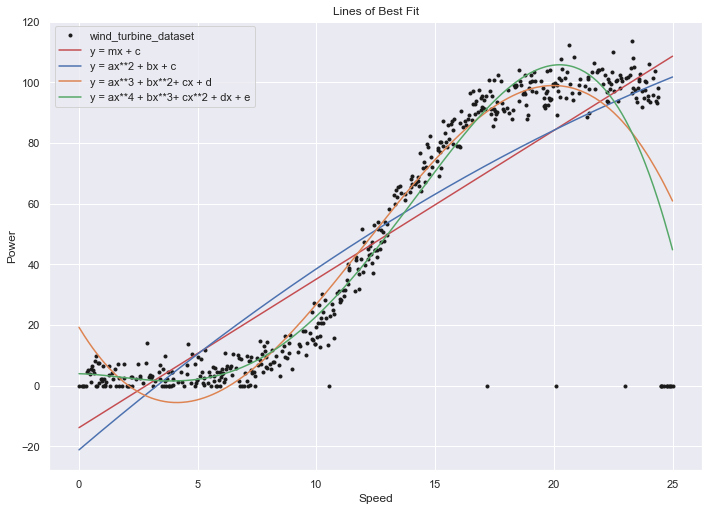

In [121]:
# fit all the lines to the one data set in an overlay fashion. 

plt.plot(wind_turbine_dataset["speed"], wind_turbine_dataset["power"], "k.", label= "wind_turbine_dataset")

x_1 = np.arange(0.0, 25.0, 1.0)
plt.plot(x, 4.9 * x + -13.899903, 'r-', label= "y = mx + c")
plt.plot(x, y1, "-", label= "y = ax**2 + bx + c")
plt.plot(x, y2, "-", label= "y = ax**3 + bx**2+ cx + d")
plt.plot(x, y3, "-", label= "y = ax**4 + bx**3+ cx**2 + dx + e")


plt.title("Lines of Best Fit")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.show()


## Summary of Polynomial Regression

Advantages of using Polynomial Regression:

    1) Polynomial provides the best approximation of the relationship between the dependent and independent variable.
    2) A Broad range of function can be fit under it.
    3) Polynomial basically fits a wide range of curvature.


Disadvantages of using Polynomial Regression

    1) The presence of one or two outliers in the data can seriously affect the results of the nonlinear analysis.
    2) These are too sensitive to the outliers.
    3) There are  fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.

# References


[1] I-Python built-in Magic Commands https://ipython.readthedocs.io/en/stable/interactive/magics.html

[2] Seaborn Controlling figure aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html

[3] Chatterjee, S. and Hadi, A.S., 2015. Regression analysis by example. John Wiley & Sons.

[4] Stephanie Glen - Regression Analysis, https://www.statisticshowto.com/probability-and-statistics/regression-analysis/

[5] Draper, N.R. and Smith, H., 1998. Applied regression analysis (Vol. 326). John Wiley & Sons.

[6] Munro, B.H., 2005. Statistical methods for health care research (Vol. 1). lippincott williams & wilkins.

[7] Ian McLoughlin. https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

[8] Understanding and Calculating the Cost Function for Linear Regression. https://medium.com/@lachlanmiller_52885/understanding-and-calculating-the-cost-function-for-linear-regression-39b8a3519fcb

[9] Numpy.org. https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

[10] Choosing the Correct Type of Regression Analysis. https://statisticsbyjim.com/regression/choosing-regression-analysis/

[11] Modelling using polynomial regression. Ostertagová, E., 2012. Modelling using polynomial regression. Procedia Engineering, 48, pp.500-506.

[12] Shanock, L.R., Baran, B.E., Gentry, W.A., Pattison, S.C. and Heggestad, E.D., 2010. Polynomial regression with response surface analysis: A powerful approach for examining moderation and overcoming limitations of difference scores. Journal of Business and Psychology, 25(4), pp.543-554.

[13] Understanding Polynomial Regression!!! https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18

[14]Introduction to Linear Regression and Polynomial Regression. https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb